### Avaliação da Qualidade de Clusters em Aprendizado Não Supervisionado

In [3]:
import pandas as pd 


# Após a criação do KMeans

cluster_labels = model.predict(samples)

NameError: name 'model' is not defined

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
k_values = range(1, 10)

for k in k_values:
		# Criar uma instância KMeans com k clusters: model
    model = KMeans(n_clusters=k, random_state=42)
    # Treinar (fit) o modelo para as amostras
    model.fit(samples) # -> precisa de amostras
    # Concatenar (append) a inércia a lista de inércias
    inertias.append(model.inertia_)

plt.plot(k_values, inertias, marker='-o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia")
plt.title("Método do Cotovelo para escolha de k")
plt.grid(True)
plt.show()



### Usando um DataSet de vinhos

In [5]:
import pandas as pd

wine_df = pd.read_csv('wine.csv')



alcohol = wine_df['alcohol']
alcohol.head(10)

0      NaN
1    13.20
2    13.16
3    14.37
4    13.24
5    14.20
6    14.39
7    14.06
8    14.83
9    13.86
Name: alcohol, dtype: float64

### Sugestão de código - Alternativa com Crosstab

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# #Usando apenas colunas numéricas, sem os rótulos class_label e class_name
colunas_numericas = wine_df.drop(columns=['class_label', 'class_name'])



# #Resolver valores nulos usando média <- Tratamento de dados
imputer = SimpleImputer(strategy='mean')
colunas_tratadas = imputer.fit_transform(colunas_numericas)



# #Normalização de dados <- Equilíbrio de dados
scaler = StandardScaler()
colunas_normalizadas = scaler.fit_transform(colunas_tratadas)


# #Aplicando KMeans <- O KMeans agora vai trabalhar por conta própria para agrupar os dados que estão sem rótulos
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
grupos = kmeans.fit_predict(colunas_normalizadas)



# #Adicionando cluster ao Dataframe original
wine_df['cluster'] = grupos
wine_df


# #Fazendo crosstab entre rótulo real e cluster atribuído
crosstab = pd.crosstab(wine_df['class_name'], wine_df['cluster'])
crosstab

cluster,0,1,2
class_name,,,
Barbera,0,48,0
Barolo,0,0,59
Grignolino,64,3,4


### Visualização Gráfica com PCA

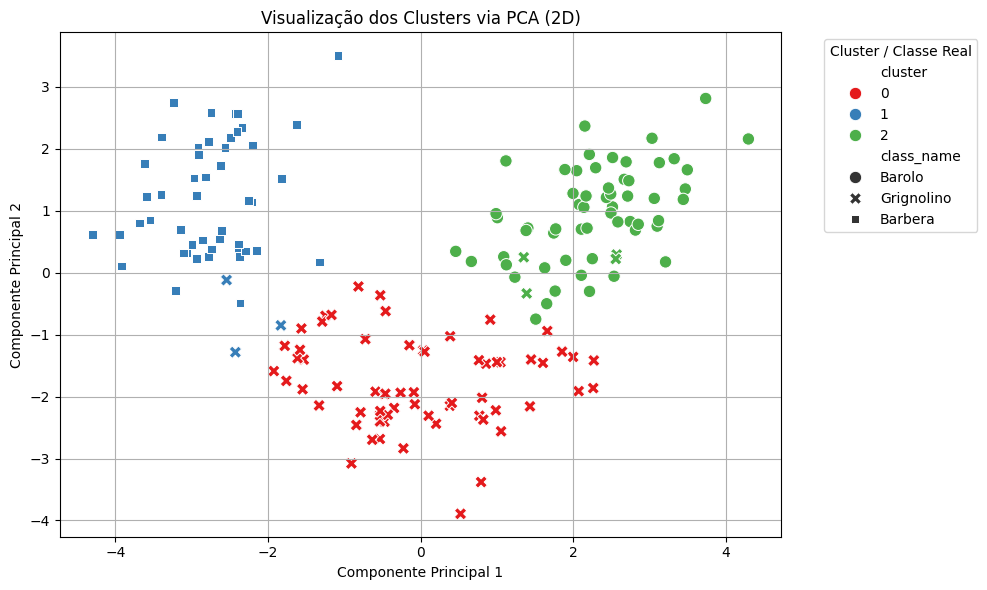

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# PCA para redução em 2 dimensões
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(colunas_normalizadas)
wine_df["PCA1"] = dados_pca[:,0]
wine_df["PCA2"] = dados_pca[:,1]

#Visualização dos clusters com os rótulos verdadeiros como estilo
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=wine_df,
    x="PCA1",
    y="PCA2",
    hue="cluster",
    style="class_name",
    palette="Set1",
    s=80
)

plt.title("Visualização dos Clusters via PCA (2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster / Classe Real", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.grid(True)
plt.show()

### Sugestão de código - Alternativa com Método do Cotovelo

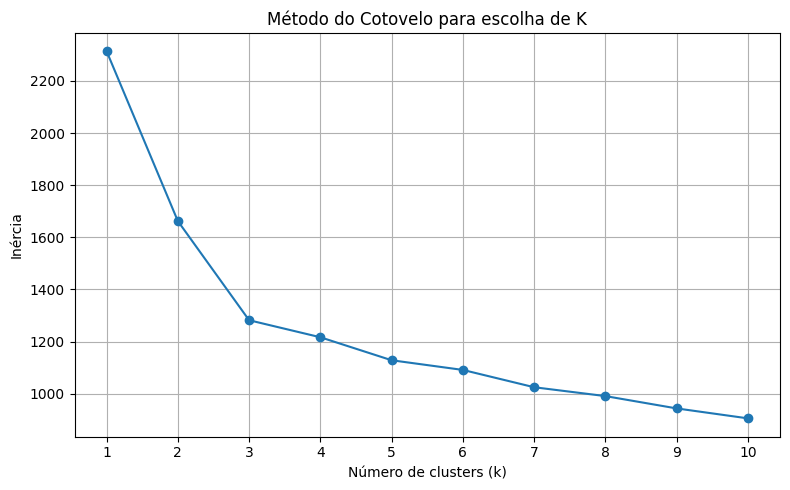

In [12]:
# Repetem-se os mesmos processos de remoção das colunas não numéricas; tratamento de dados nulos e normalização dos dados. A diferença, agora, é que o KMeans vai trabalhar sob uma métrica de Inércia


inercias = []
k_valores = range(1,11)

for k in k_valores:
    # criando instância KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    # Treinar a instância com as colunas normalizadas
    kmeans.fit(colunas_normalizadas)
    # Guardar o valor da inércia no array inercias
    inercias.append(kmeans.inertia_)


# Visualização Gráfica
plt.figure(figsize=(8,5))
plt.plot(k_valores, inercias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para escolha de K')
plt.xticks(k_valores)
plt.grid(True)
plt.tight_layout()
plt.show()